## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

!pip install catboost

# Data Preprocessing

In [ ]:
dataset = pd.read_csv(
    "/kaggle/input/car-evaluation-data-set/car_evaluation.csv",
    header=None,
    names=["buying price", "maintenance cost", "number of doors", "number of persons", "lug_boot", "safety", "decision"])
dataset.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Checking for Null Values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
dataset.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
lug_boot             0
safety               0
decision             0
dtype: int64

In [ ]:
for col in dataset.columns:
    print(dataset[col].value_counts())
    print("-" * 40)

vhigh    432
low      432
high     432
med      432
Name: buying price, dtype: int64
----------------------------------------
vhigh    432
low      432
high     432
med      432
Name: maintenance cost, dtype: int64
----------------------------------------
3        432
5more    432
2        432
4        432
Name: number of doors, dtype: int64
----------------------------------------
2       576
4       576
more    576
Name: number of persons, dtype: int64
----------------------------------------
big      576
small    576
med      576
Name: lug_boot, dtype: int64
----------------------------------------
low     576
high    576
med     576
Name: safety, dtype: int64
----------------------------------------
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64
----------------------------------------


## EDA

### Count of Buying Prices seperated by Decision

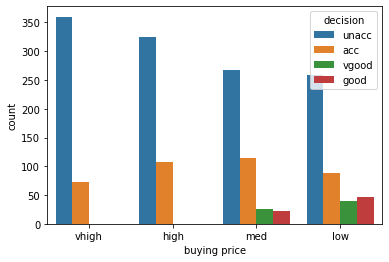

In [ ]:
sns.countplot(x="buying price", hue="decision", data=dataset)

### Count of Safety seperated by Decision

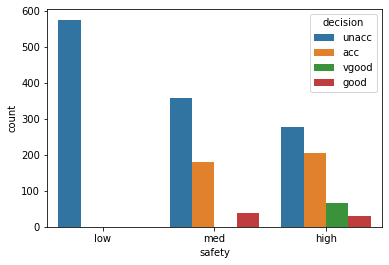

In [ ]:
sns.countplot(x="safety", hue="decision", data=dataset)

In [ ]:
dataset.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Preparing Data for Model

In [ ]:
X = dataset.drop("decision", axis=1)
y = dataset.decision

In [ ]:
X = pd.get_dummies(X)
X.head()

,buying price_high,buying price_low,buying price_med,buying price_vhigh,maintenance cost_high,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_2,number of doors_3,number of doors_4,number of doors_5more,number of persons_2,number of persons_4,number of persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
y = y.replace(
    {
        "unacc" : 0,
        "acc" : 1,
        "good" : 2,
        "vgood" : 3
    }
)
y.value_counts()

0    1210
1     384
2      69
3      65
Name: decision, dtype: int64

# Model

## Splitting Data into Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Testing Multiple Classification Models

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

In [ ]:
row_num = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
  classifier.fit(X_train, y_train) # Training Classifier with Default Hyperparameters

  y_pred = classifier.predict(X_test) # Getting Prediction for testing data
  classifier_accuracy_score = accuracy_score(y_test, y_pred) # Calculating Accuracy Score for test Predictions

  kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) # Using crossvalscore for unbaised Accuracy Score

  # Adding the above gatthered data into a pandas DataFrame
  MLA_name = classifier.__class__.__name__
  MLA_compare.loc[row_num, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_num, 'Accuracy Score'] = classifier_accuracy_score*100
  MLA_compare.loc[row_num, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

  print(MLA_name, "Done")
  row_num+=1

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
GaussianProcessClassifier Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
SVC Done
LinearSVC Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
LinearDiscriminantAnalysis Done


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning:

divide by zero en

Streaming output truncated to the last 5000 lines.
5:	learn: 0.9004136	total: 20.7ms	remaining: 3.42s
6:	learn: 0.8521302	total: 24.3ms	remaining: 3.45s
7:	learn: 0.8083170	total: 28ms	remaining: 3.47s
8:	learn: 0.7638021	total: 31.7ms	remaining: 3.49s
9:	learn: 0.7214441	total: 35.6ms	remaining: 3.52s
10:	learn: 0.6906528	total: 39ms	remaining: 3.51s
11:	learn: 0.6628654	total: 42.7ms	remaining: 3.52s
12:	learn: 0.6295018	total: 46.8ms	remaining: 3.55s
13:	learn: 0.6039192	total: 50.8ms	remaining: 3.58s
14:	learn: 0.5809469	total: 54.5ms	remaining: 3.58s
15:	learn: 0.5556722	total: 58.6ms	remaining: 3.6s
16:	learn: 0.5316388	total: 62.4ms	remaining: 3.6s
17:	learn: 0.5109870	total: 66ms	remaining: 3.6s
18:	learn: 0.4962604	total: 69.7ms	remaining: 3.6s
19:	learn: 0.4775869	total: 73.7ms	remaining: 3.61s
20:	learn: 0.4635467	total: 77.4ms	remaining: 3.61s
21:	learn: 0.4459930	total: 81.1ms	remaining: 3.6s
22:	learn: 0.4332178	total: 85.1ms	remaining: 3.61s
23:	learn: 0.4157356	total: 8

In [ ]:
# Viewing Accuracy Scores in Descending Order of K-Fold Accuracy
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True) 
MLA_compare[:10]

,MLA Name,Accuracy Score,K-Fold Accuracy
0,CatBoostClassifier,98.265896,98.480867
1,GradientBoostingClassifier,97.976879,98.192576
2,BaggingClassifier,96.820809,97.251069
3,DecisionTreeClassifier,97.109827,97.033677
4,SVC,95.953757,96.959128
5,ExtraTreesClassifier,95.375723,96.597852
6,RandomForestClassifier,95.375723,95.947764
7,XGBClassifier,95.953757,95.659472
8,GaussianProcessClassifier,91.329480,90.740277
9,LinearSVC,90.173410,89.075696


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x = MLA_compare["MLA Name"],
    y = MLA_compare["Accuracy Score"],
))
fig.update_layout(
  title="Comparing Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="Accuracy Score"
)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x = MLA_compare["MLA Name"],
    y = MLA_compare["K-Fold Accuracy"],
))
fig.update_layout(
  title="Comparing K-Fold Accuracy Scores of Machine Learning Models",
  xaxis_title="Machine Learning Algorithm",
  yaxis_title="K_Fold Accuracy Score"
)